In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('bank_data.csv')

In [5]:
data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
data.shape

(45211, 32)

In [7]:
data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin.', 'joblue.collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown', 'y'],
      dtype='object')

In [8]:
data.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.isnull().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
sc = StandardScaler()

In [12]:
x = data[['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin.', 'joblue.collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown']]

In [13]:
y = data['y']

In [14]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [15]:
x = sc.fit_transform(x)

In [16]:
x

array([[ 1.60696496, -0.13548989,  0.25641925, ..., -0.4494137 ,
        -0.17226632, -0.08006853],
       [ 0.28852927, -0.13548989, -0.43789469, ...,  2.22512133,
        -0.17226632, -0.08006853],
       [-0.74738448, -0.13548989, -0.44676247, ..., -0.4494137 ,
        -0.17226632, -0.08006853],
       ...,
       [ 2.92540065, -0.13548989,  1.42959305, ..., -0.4494137 ,
        -0.17226632, -0.08006853],
       [ 1.51279098, -0.13548989, -0.22802402, ..., -0.4494137 ,
        -0.17226632, -0.08006853],
       [-0.37068857, -0.13548989,  0.52836436, ..., -0.4494137 ,
        -0.17226632, -0.08006853]])

In [17]:
#pca

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()
X = pca.fit_transform(x)

In [20]:
X

array([[-1.54793641e+00,  1.30612621e+00,  7.44708293e-01, ...,
        -2.28376505e-14, -1.40378904e-14,  5.49158896e-15],
       [-1.32171196e+00, -1.76585684e+00,  1.12543804e+00, ...,
        -1.92403369e-15,  7.88225117e-16, -2.51874723e-15],
       [-1.70797053e+00,  5.58318033e-01,  1.90605423e+00, ...,
        -2.64817442e-16, -4.01705660e-15,  1.14729161e-15],
       ...,
       [ 3.04507664e+00,  3.96330282e+00, -2.51030807e+00, ...,
         1.27759758e-16, -1.34321052e-17, -3.43750562e-16],
       [-1.25035228e+00,  2.31581504e+00,  2.58067162e-01, ...,
         7.87469260e-17, -1.62881567e-16,  7.59292005e-17],
       [ 4.48814889e+00,  1.38086875e+00,  5.43735812e-01, ...,
         2.17368298e-16, -3.57850575e-16, -3.78000469e-16]])

In [21]:
var = pca.explained_variance_ratio_
var

array([1.10143273e-01, 7.39236604e-02, 6.15781160e-02, 4.98429827e-02,
       4.38894195e-02, 4.00212834e-02, 3.80157381e-02, 3.73290107e-02,
       3.65260650e-02, 3.59582051e-02, 3.51611422e-02, 3.43236004e-02,
       3.38796987e-02, 3.35802270e-02, 3.31289493e-02, 3.30155716e-02,
       3.25341639e-02, 3.17187352e-02, 3.06887636e-02, 2.92944481e-02,
       2.86788261e-02, 2.80677168e-02, 2.74442119e-02, 2.26360892e-02,
       1.98702652e-02, 1.38903050e-02, 4.85953161e-03, 3.74584765e-31,
       5.38764533e-32, 5.09179100e-32, 6.58834486e-33])

<BarContainer object of 31 artists>

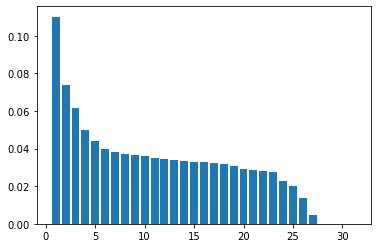

In [22]:
plt.bar(range(1,len(var)+1),var)

In [23]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([11.01, 18.4 , 24.56, 29.54, 33.93, 37.93, 41.73, 45.46, 49.11,
       52.71, 56.23, 59.66, 63.05, 66.41, 69.72, 73.02, 76.27, 79.44,
       82.51, 85.44, 88.31, 91.12, 93.86, 96.12, 98.11, 99.5 , 99.99,
       99.99, 99.99, 99.99, 99.99])

In [24]:
pca.components_

array([[-3.47574671e-02, -2.91892303e-02,  2.16727545e-02,
         1.07336364e-02, -2.06002824e-02,  8.82062136e-03,
        -7.16501642e-02,  4.70174599e-01,  3.35676235e-01,
         3.81534105e-01,  2.26120178e-01,  1.72408231e-01,
        -5.02961796e-01,  2.81336724e-01, -1.21050027e-02,
        -2.90220657e-01, -1.44408359e-03, -5.77157862e-02,
         6.37487518e-02,  2.18587632e-02, -4.81820716e-02,
        -1.37581439e-02, -2.44647471e-02,  3.53809319e-02,
        -2.67522485e-03,  2.09339703e-04, -1.16406677e-02,
         4.76016684e-02,  1.00047450e-02, -1.87705480e-03,
        -1.75900241e-02],
       [ 4.77008644e-01, -2.16984463e-02,  7.19743734e-02,
        -6.08418107e-02,  1.99039962e-02, -1.46616289e-02,
         1.22365322e-02,  6.36030420e-02,  5.83718131e-02,
         6.75573538e-02,  1.09750417e-02,  3.46034604e-02,
        -7.60878274e-02, -7.34744058e-02,  1.59203367e-01,
        -8.71629501e-03, -7.92808840e-03,  5.05268697e-01,
        -5.43504589e-01, -6.65

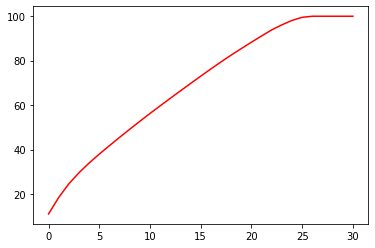

In [25]:
plt.plot(var1,color='red')

In [26]:
final_x = pd.concat([pd.DataFrame(X[:,0:25],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25'])],axis=1)

In [27]:
final_x.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25
0,-1.547936,1.306126,0.744708,0.419760,0.612910,2.176666,0.152831,0.908730,0.905871,-0.167663,...,-0.176314,-0.354860,0.227881,-0.752294,-0.489866,-0.178268,-0.138015,0.164729,-0.408420,-0.011700
1,-1.321712,-1.765857,1.125438,1.207979,-0.237043,-1.139662,-0.011310,2.011210,0.904672,-0.361609,...,-0.111346,-0.327455,0.112150,-0.730415,-0.260546,-0.097063,0.220663,-0.871995,-0.335043,0.054640
2,-1.707971,0.558318,1.906054,-0.865341,-0.890349,-0.225493,0.794238,-0.965685,1.032378,0.313346,...,-0.961925,1.026400,-0.775838,0.302868,-1.385445,0.920866,0.878609,-0.493201,-0.231127,-0.089821
3,-1.726472,1.107381,2.322929,-0.133805,0.626884,0.286959,-0.792920,0.443260,-0.630378,-0.284658,...,-0.167021,0.298615,-0.521180,-0.552052,0.009358,0.442593,-0.302698,-0.395229,0.087125,0.091466
4,-1.553752,-1.421509,0.173128,2.364681,2.167484,-0.785282,0.681668,-0.022984,1.296125,-0.525139,...,2.254695,9.767987,5.594791,-0.783891,-0.962548,1.206245,1.126471,-0.453679,-1.129559,0.146140


splitting data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(final_x,y, test_size=0.2,random_state=42)

In [29]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))


Train data shape: (36168, 25)
Test data shape: (9043, 25)


model building

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train,Y_train)

LogisticRegression()

testing model

In [33]:
Y_pred = model.predict(X_test)

In [34]:
result = {
    'Actual': Y_test,
    'Predicted': Y_pred
}

In [35]:
pd.DataFrame(result)

,Actual,Predicted
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
...,...,...
13353,0,0
38732,1,0
5654,0,0
3779,0,0


confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [37]:
print("Accuracy Score: {}".format(accuracy_score(Y_test, Y_pred)))


Accuracy Score: 0.8976003538648678


In [38]:
# accuracy of model is 89%

In [39]:
print("Confusion Matrix:\n {}".format(confusion_matrix(Y_test, Y_pred)))


Confusion Matrix:
 [[7763  189]
 [ 737  354]]


In [40]:
print("Classification Report:\n {}".format(classification_report(Y_test, Y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.32      0.43      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043

